In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Veri setini yükleyip tab karakteri ile ayırdık
data = pd.read_csv('data.txt',sep='\t')

# Eksik değerleri median ile doldurduk
data = data.replace(0, data.median())

# Özellikler ve hedef değişkeni ayırdık
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Min-Max normalizasyonu uyguladık
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Normalizasyon sonrası veriyi tekrar DataFrame'e dönüştürdük
data_normalized = pd.DataFrame(X_normalized, columns=X.columns)
data_normalized['Outcome'] = y.values

# Normalizasyon sonrası özet yazdıralım
data_normalized.to_csv('normalizasyon-data.csv', index=False)
print(data_normalized.head())


        6       148        72        35         0      33.6     0.627  \
0  0.0000  0.264516  0.428571  0.239130  0.021635  0.171779  0.116567   
1  0.4375  0.896774  0.408163  0.173913  0.021635  0.104294  0.253629   
2  0.0000  0.290323  0.428571  0.173913  0.096154  0.202454  0.038002   
3  0.1250  0.600000  0.163265  0.304348  0.185096  0.509202  0.943638   
4  0.2500  0.464516  0.510204  0.173913  0.021635  0.151329  0.052519   

         50  Outcome  
0  0.166667        0  
1  0.183333        1  
2  0.000000        0  
3  0.200000        1  
4  0.150000        0  


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [12]:
# Normalizasyon sonrası veri setini yükleyelim
data = pd.read_csv('normalizasyon-data.csv')

In [15]:
# Eksik değerleri median ile doldurduk
data = data.replace(0, data.median())

# Özellikler ve hedef değişkeni ayırdık
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Veriyi normalleştirdik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA uyguladık
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA bileşenleri
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])

# LDA uyguladık tek bileşenle 
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# LDA bileşenleri 
lda_components = pd.DataFrame(lda.scalings_, index=X.columns, columns=['LD1'])

# Sonuçları raporladık
print("PCA Bileşenleri:")
print(pca_components)

print("\nLDA Bileşenleri:")
print(lda_components)

# PCA ve LDA ile boyut indirgeme sonrası veriyi birleştidik
data_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
data_pca['Outcome'] = y.values

data_lda = pd.DataFrame(X_lda, columns=['LD1'])
data_lda['Outcome'] = y.values

# PCA ve LDA ile boyut indirgeme sonrası veriyi kaydettik
data_pca.to_csv('pima-indians-diabetes-pca.csv', index=False)
data_lda.to_csv('pima-indians-diabetes-lda.csv', index=False)

PCA Bileşenleri:
            6       148        72        35         0      33.6     0.627  \
PC1  0.297340  0.422200  0.365822  0.418131  0.287195  0.439789  0.201783   
PC2 -0.510623  0.030641 -0.269816  0.311340  0.372937  0.286497  0.248142   

           50  
PC1  0.328734  
PC2 -0.534654  

LDA Bileşenleri:
            LD1
6     -0.324516
148   -0.917096
72     0.070587
35     0.011200
0      0.110054
33.6  -0.452723
0.627 -0.197851
50    -0.070813


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
# Veri setini yükledik
data = pd.read_csv('data.txt',sep='\t')

# Eksik değerleri median ile doldurduk
data = data.replace(0, data.median())

# Özellikler ve hedef değişkeni ayırdık
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Veriyi normalleştirdik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini %70 eğitim ve %30 test olarak ayırdık
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [18]:
################################################# Çoklu Doğrusal Regresyon    ################################
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Çoklu doğrusal regresyon modeli oluşturun ve eğitin
lr = LinearRegression()
lr.fit(X_train, y_train)

# Katsayıları ve kesişim noktalarını raporlayın
print("Çoklu Doğrusal Regresyon Katsayıları:", lr.coef_)
print("Çoklu Doğrusal Regresyon Kesişim Noktası:", lr.intercept_)

# Test kümesi üzerinde tahminler yapın
y_pred_lr = lr.predict(X_test)

# Performans metriklerini hesaplayın
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Çoklu Doğrusal Regresyon MSE:", mse_lr)
print("Çoklu Doğrusal Regresyon R^2:", r2_lr)

Çoklu Doğrusal Regresyon Katsayıları: [0.07133064 0.18677481 0.00291997 0.00206833 0.00249816 0.08734914
 0.05130647 0.01913137]
Çoklu Doğrusal Regresyon Kesişim Noktası: 0.3483416423237544
Çoklu Doğrusal Regresyon MSE: 0.15052565493296785
Çoklu Doğrusal Regresyon R^2: 0.33508282509287257


In [20]:
################################################# Multinominal Lojistik Regresyon    ################################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Multinominal lojistik regresyon modeli oluşturun ve eğitin
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# Katsayıları ve kesişim noktalarını raporlayın
print("Multinominal Lojistik Regresyon Katsayıları:", log_reg.coef_)
print("Multinominal Lojistik Regresyon Kesişim Noktası:", log_reg.intercept_)

# Test kümesi üzerinde tahminler yapın
y_pred_log_reg = log_reg.predict(X_test)

# Performans metriklerini hesaplayın
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Multinominal Lojistik Regresyon Doğruluk:", accuracy_log_reg)
print("Multinominal Lojistik Regresyon Confusion Matrix:\n", conf_matrix_log_reg)
print("Multinominal Lojistik Regresyon Classification Report:\n", class_report_log_reg)


Multinominal Lojistik Regresyon Katsayıları: [[ 0.20174049  0.53362724 -0.00064127  0.01527212 -0.00921502  0.28313878
   0.16406099  0.06847369]]
Multinominal Lojistik Regresyon Kesişim Noktası: [-0.42854374]
Multinominal Lojistik Regresyon Doğruluk: 0.8008658008658008
Multinominal Lojistik Regresyon Confusion Matrix:
 [[138  13]
 [ 33  47]]
Multinominal Lojistik Regresyon Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       151
           1       0.78      0.59      0.67        80

    accuracy                           0.80       231
   macro avg       0.80      0.75      0.76       231
weighted avg       0.80      0.80      0.79       231



In [21]:
################################################# Karar Ağacı Sınıflandırma    ################################
# Veri setini yükledik
data = pd.read_csv('data.txt',sep='\t')

# Eksik değerleri median ile doldurduk
data = data.replace(0, data.median())

# Özellikler ve hedef değişkeni ayırdık
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Veriyi normalleştirdik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini %70 eğitim ve %30 test olarak ayırdık
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

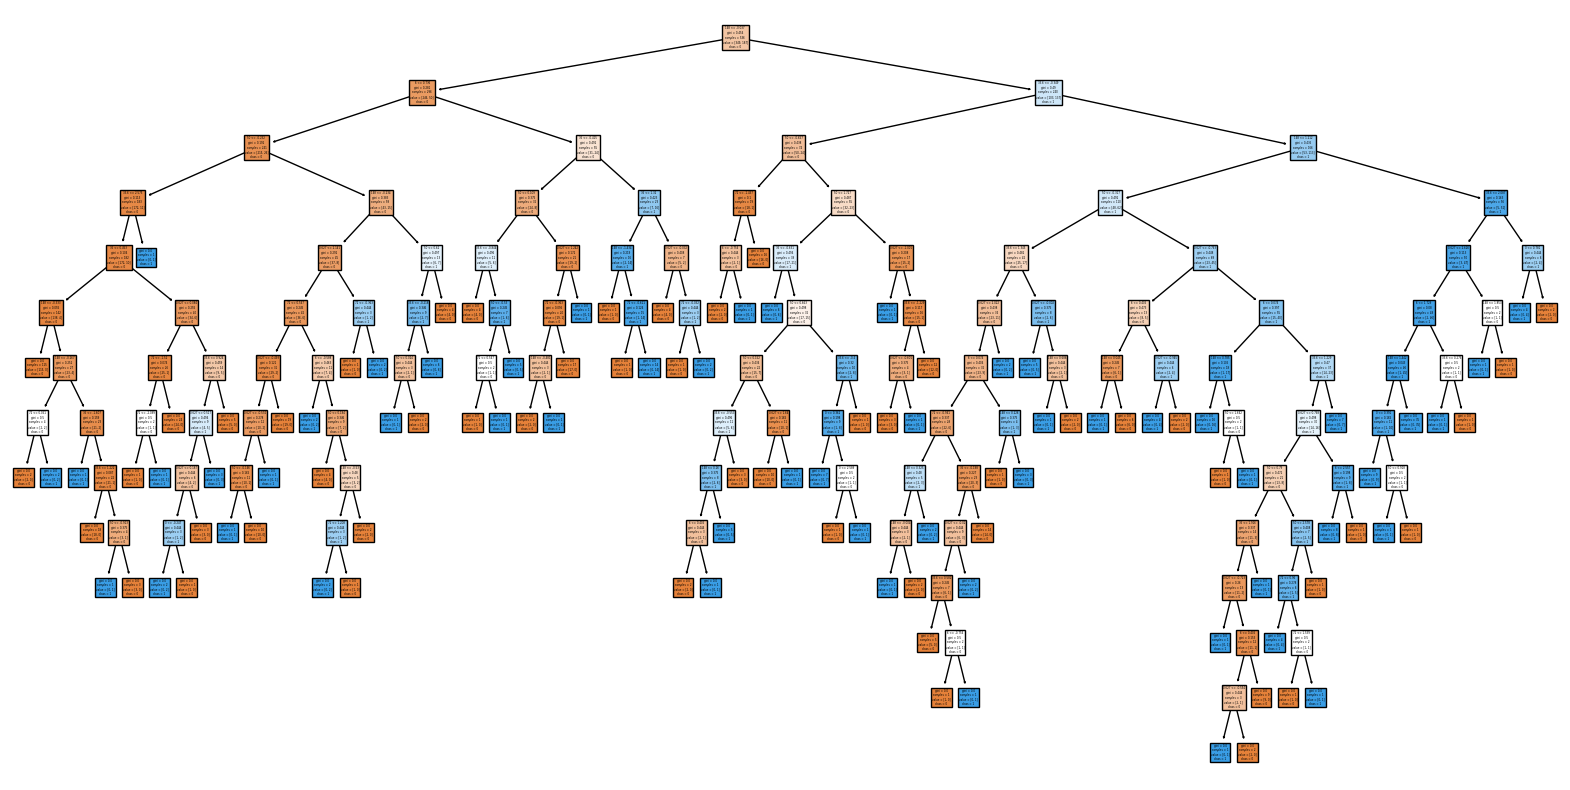

Karar Ağacı Sınıflandırma Doğruluk: 0.6926406926406926
Karar Ağacı Sınıflandırma Confusion Matrix:
 [[118  33]
 [ 38  42]]
Karar Ağacı Sınıflandırma Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       151
           1       0.56      0.53      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.66       231
weighted avg       0.69      0.69      0.69       231



In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Karar ağacı sınıflandırma modeli oluşturun ve eğitin
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Ağaç yapısını görselleştirin
plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=data.columns[:-1], class_names=['0', '1'], filled=True)
plt.show()

# Test kümesi üzerinde tahminler yapın
y_pred_dt = dt.predict(X_test)

# Performans metriklerini hesaplayın
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
print("Karar Ağacı Sınıflandırma Doğruluk:", accuracy_dt)
print("Karar Ağacı Sınıflandırma Confusion Matrix:\n", conf_matrix_dt)
print("Karar Ağacı Sınıflandırma Classification Report:\n", class_report_dt)


In [23]:
################################################# Naive Bayes Sınıflandırma    ################################
# Veri setini yükledik
data = pd.read_csv('data.txt',sep='\t')

# Eksik değerleri median ile doldurduk
data = data.replace(0, data.median())

# Özellikler ve hedef değişkeni ayırdık
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Veriyi normalleştirdik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini %70 eğitim ve %30 test olarak ayırdık
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Naive Bayes Sınıflandırma Doğruluk: 0.7445887445887446
Naive Bayes Sınıflandırma Confusion Matrix:
 [[126  25]
 [ 34  46]]
Naive Bayes Sınıflandırma Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Naive Bayes Sınıflandırma Sensitivity: 0.575
Naive Bayes Sınıflandırma Specificity: 0.8344370860927153
Naive Bayes Sınıflandırma F1-Score: 0.6808410666040173
Naive Bayes Sınıflandırma ROC AUC: 0.8009105960264901


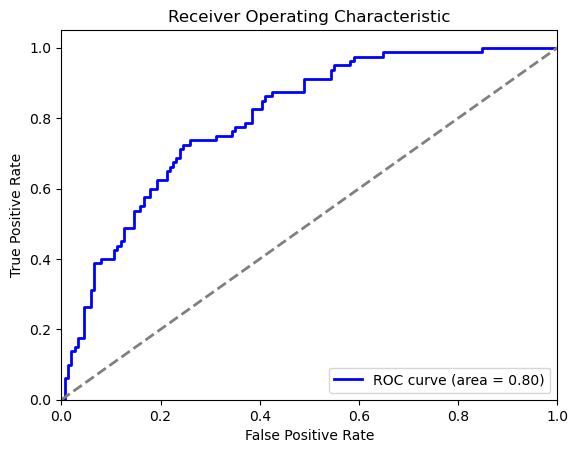

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Naive Bayes sınıflandırma modeli oluşturun ve eğitin
nb = GaussianNB()
nb.fit(X_train, y_train)

# Test kümesi üzerinde tahminler yapın
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]

# Performans metriklerini hesaplayın
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

# Sensitivity, Specificity, F1-score hesaplama
tp = conf_matrix_nb[1, 1]
tn = conf_matrix_nb[0, 0]
fp = conf_matrix_nb[0, 1]
fn = conf_matrix_nb[1, 0]

sensitivity_nb = tp / (tp + fn)
specificity_nb = tn / (tn + fp)
f1_score_nb = 2 * (sensitivity_nb * specificity_nb) / (sensitivity_nb + specificity_nb)

# ROC Curve ve AUC hesaplama
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_nb)

# Sonuçları raporlama
print("Naive Bayes Sınıflandırma Doğruluk:", accuracy_nb)
print("Naive Bayes Sınıflandırma Confusion Matrix:\n", conf_matrix_nb)
print("Naive Bayes Sınıflandırma Classification Report:\n", class_report_nb)
print("Naive Bayes Sınıflandırma Sensitivity:", sensitivity_nb)
print("Naive Bayes Sınıflandırma Specificity:", specificity_nb)
print("Naive Bayes Sınıflandırma F1-Score:", f1_score_nb)
print("Naive Bayes Sınıflandırma ROC AUC:", roc_auc_nb)

# ROC curve plot
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
